This code is for creating and training a deep learning model to classify images into two categories (such as landfill and not landfill). Here's a breakdown of what each part of the code does:

## 1. Import Libraries:

- TensorFlow and specific modules from Keras are imported, which are essential for building and training neural network models.

## 2. Load Pre-Trained VGG16 Model:

- VGG16, a popular convolutional neural network pre-trained on ImageNet, is loaded. The include_top=False argument removes the top layer (fully connected layers) to allow for custom layers to be added. The input shape is set to 150x150x3, suitable for RGB images of size 150x150.

## 3. Freeze Base Model Layers:

- The layers of the base model (VGG16) are set to non-trainable to preserve their learned weights during initial training.

## 4. Add Custom Layers:

- A GlobalAveragePooling2D layer is added to reduce dimensionality.
- A fully connected (Dense) layer with 1024 neurons and ReLU activation is added.
- The final output layer is a Dense layer with one neuron and a sigmoid activation function, suitable for binary classification.

## 5. Compile the Model:

- The model is compiled with the Adam optimizer and binary cross-entropy loss function, which are standard choices for binary classification tasks. Accuracy is chosen as the metric.

## 6. Prepare Data Generators for Training and Testing:

- ImageDataGenerators are set up for both training and testing data. They automatically label images based on the directory structure (images in sorted_images/0 and sorted_images/1) and apply rescaling as a basic form of image normalization.

## 7. Train the Model:

- The model is trained on the images from train_generator. steps_per_epoch and epochs determine how many batches of images are used per epoch and how many times the entire dataset is passed through the network, respectively.

## 8. Evaluate the Model:

- After training, the model's performance is evaluated using the test_generator, providing an accuracy score on the test dataset.

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load and configure the VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Data preprocessing
train_dir = 'sorted_images'  # Update with your path
test_dir = 'testing'  # Update with your path

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(150, 150), batch_size=32, class_mode='binary')
test_generator = test_datagen.flow_from_directory(
    test_dir, target_size=(150, 150), batch_size=32, class_mode='binary')

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=100,  # Adjust based on your dataset
    epochs=10,
    validation_data=test_generator,
    validation_steps=50)  # Adjust based on your dataset

# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc}')


Found 10434 images belonging to 2 classes.
Found 10 images belonging to 2 classes.
Epoch 1/10
100/100 [==============================] - ETA: 0s - loss: 0.4873 - accuracy: 0.7434WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 50 batches). You may need to use the repeat() function when building your dataset.


100/100 [==============================] - 214s 2s/step - loss: 0.4873 - accuracy: 0.7434 - val_loss: 0.5379 - val_accuracy: 0.7000
Epoch 2/10
100/100 [==============================] - 207s 2s/step - loss: 0.4292 - accuracy: 0.7819
Epoch 3/10
100/100 [==============================] - 196s 2s/step - loss: 0.4285 - accuracy: 0.7922
Epoch 4/10
100/100 [==============================] - 195s 2s/step - loss: 0.4198 - accuracy: 0.7897
Epoch 5/10
100/100 [==============================] - 189s 2s/step - loss: 0.4036 - accuracy: 0.8006
Epoch 6/10
100/100 [==============================] - 191s 2s/step - loss: 0.4201 - accuracy: 0.7916
Epoch 7/10
100/100 [==============================] - 192s 2s/step - loss: 0.4123 - accuracy: 0.7915
Epoch 8/10
100/100 [==============================] - 192s 2s/step - loss: 0.3930 - accuracy: 0.8006
Epoch 9/10
100/100 [==============================] - 191s 2s/step - loss: 0.3823 - accuracy: 0.8109
Epoch 10/10
1/1 [==============================] - 1s 869ms/

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    'testing',
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc}')

Found 13 images belonging to 2 classes.
1/1 [==============================] - 1s 1s/step - loss: 0.1527 - accuracy: 1.0000
Test accuracy: 1.0


1/1 [==============================] - 0s 61ms/step


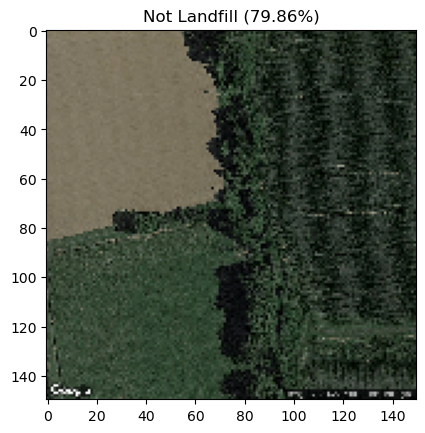

1/1 [==============================] - 0s 71ms/step


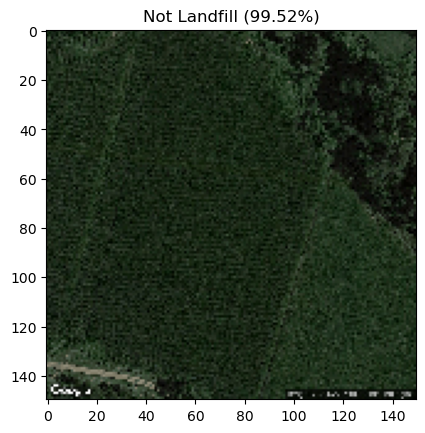

1/1 [==============================] - 0s 69ms/step


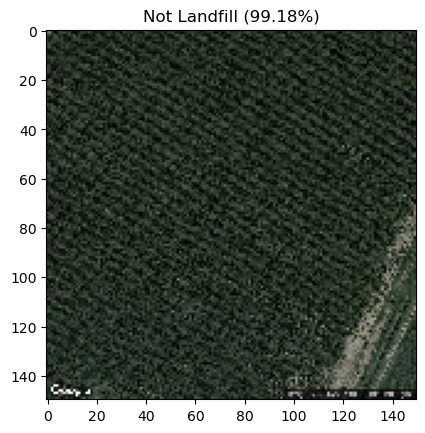

1/1 [==============================] - 0s 65ms/step


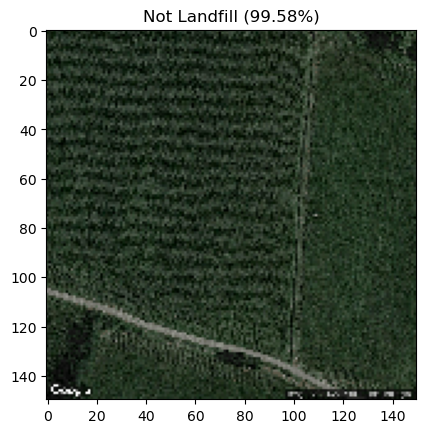

1/1 [==============================] - 0s 69ms/step


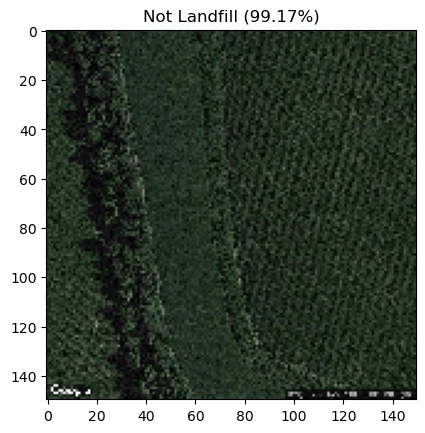

1/1 [==============================] - 0s 61ms/step


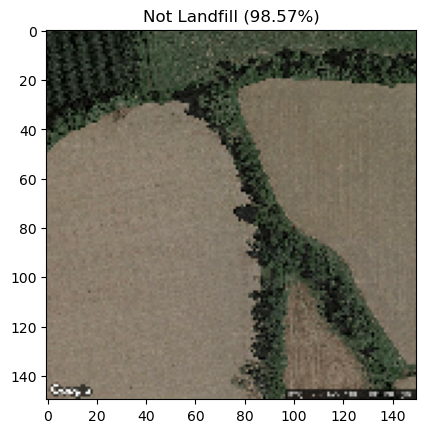

1/1 [==============================] - 0s 65ms/step


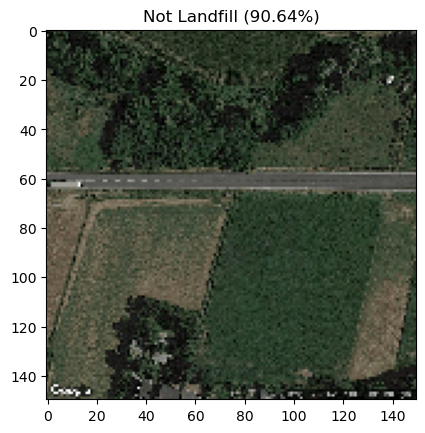

1/1 [==============================] - 0s 66ms/step


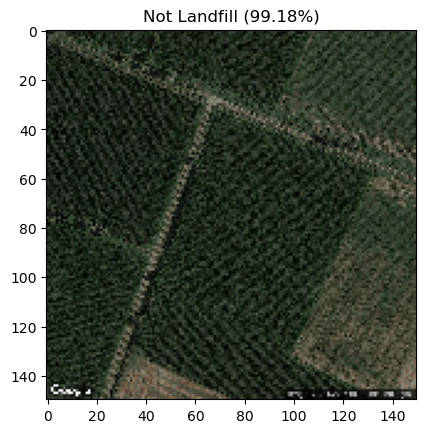

1/1 [==============================] - 0s 61ms/step


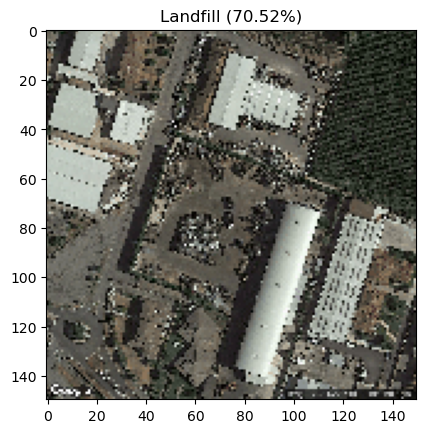

1/1 [==============================] - 0s 63ms/step


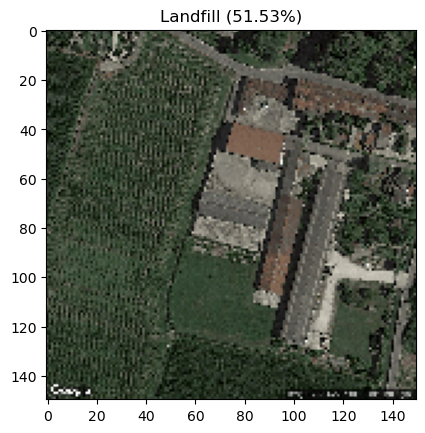

1/1 [==============================] - 0s 64ms/step


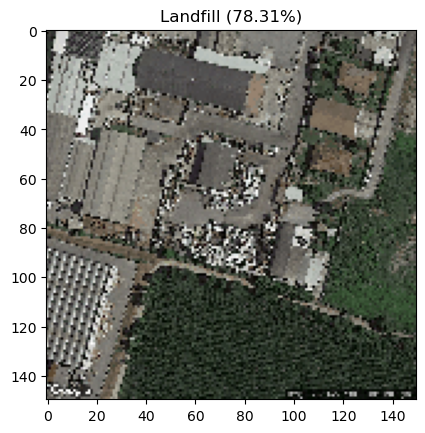

1/1 [==============================] - 0s 64ms/step


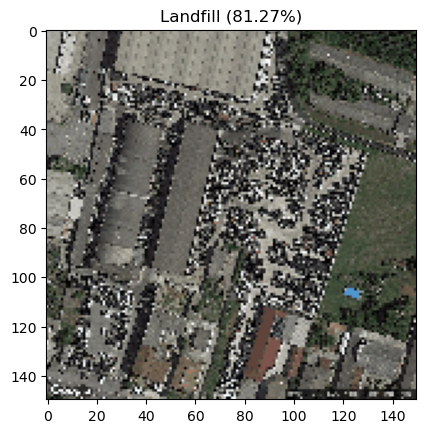

1/1 [==============================] - 0s 73ms/step


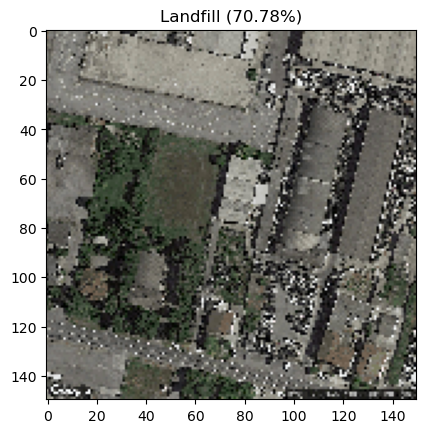

1/1 [==============================] - 0s 79ms/step


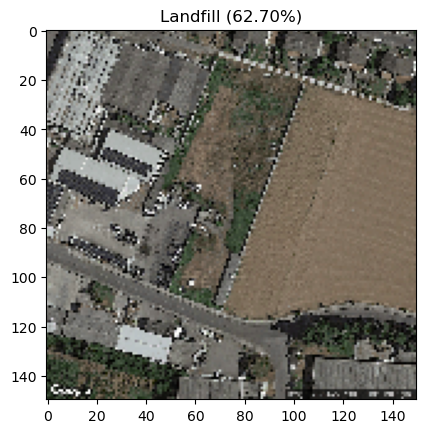

1/1 [==============================] - 0s 64ms/step


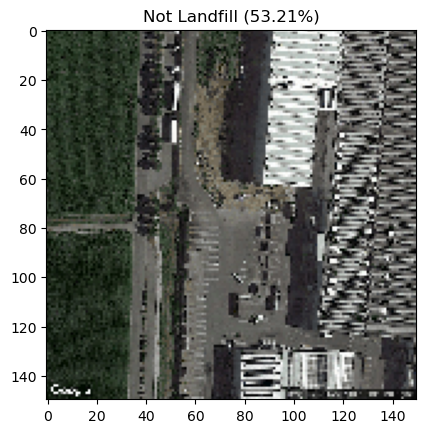

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np
import os

# Directory with test images
test_dir = 'testing'  # update this path

# Lists to store file paths
test_images_0 = [os.path.join(test_dir, '0', img) for img in os.listdir(os.path.join(test_dir, '0'))]
test_images_1 = [os.path.join(test_dir, '1', img) for img in os.listdir(os.path.join(test_dir, '1'))]

# Combining both sets of images
test_images = test_images_0 + test_images_1

# Process each test image and make a prediction
for img_path in test_images:
    img = image.load_img(img_path, target_size=(150, 150))
    img_tensor = image.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis=0)
    img_tensor /= 255.

    prediction = model.predict(img_tensor)
    predicted_class = 'Landfill' if prediction[0][0] > 0.5 else 'Not Landfill'
    confidence = prediction[0][0] if prediction[0][0] > 0.5 else 1 - prediction[0][0]

    # Plot image with predicted class and confidence
    plt.imshow(img)
    plt.title(f'{predicted_class} ({confidence:.2%})')
    plt.show()